In [1]:
import os
import datetime
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Environment Data

In [2]:
folder = r'C:\Users\Georg\Desktop\TTRS\2-EMS\research\Forecasting\RawData\LoadData\new_buildings\Temperature'
files= os.listdir(folder)
data = pd.DataFrame()
for file in files:
    if file.endswith(".csv"):
        path = os.path.join(folder,file)
        df = pd.read_csv(path)
        data = pd.concat([data,df],axis=0)

In [3]:
data = data.iloc[:,:3]
data.columns = ['time2','ID','Temperature']
data_temp = data[['time2', 'Temperature']]
data_temp
data_temp.index = range(len(data_temp))
data_temp

,time2,Temperature
0,2024-01-08 11:35:00,9.5
1,2024-01-08 11:40:00,9.5
2,2024-01-08 11:45:00,9.5
3,2024-01-08 11:50:00,9.5
4,2024-01-08 11:55:00,9.5
...,...,...
39351,2024-05-30 23:35:00,26.8
39352,2024-05-30 23:40:00,26.8
39353,2024-05-30 23:45:00,26.8
39354,2024-05-30 23:50:00,26.8


### Load Data

In [4]:
folder = r'C:\Users\Georg\Desktop\TTRS\2-EMS\research\Forecasting\RawData\LoadData\new_buildings'
files= os.listdir(folder)
data = pd.DataFrame()
for file in files:
    if file.endswith(".csv"):
        path = os.path.join(folder,file)
        df = pd.read_csv(path)
        data = pd.concat([data,df],axis=0)

In [5]:
data = data.iloc[:,:3]
data.columns = ['time','ID','Power']
data

,time,ID,Power
0,2024-01-08 11:35:00,研发栋高压柜1# 1HP104高压分电盘 有功功率kW,150
1,2024-01-08 11:40:00,研发栋高压柜1# 1HP104高压分电盘 有功功率kW,150
2,2024-01-08 11:45:00,研发栋高压柜1# 1HP104高压分电盘 有功功率kW,150
3,2024-01-08 11:50:00,研发栋高压柜1# 1HP104高压分电盘 有功功率kW,150
4,2024-01-08 11:55:00,研发栋高压柜1# 1HP104高压分电盘 有功功率kW,150
...,...,...,...
8147,2024-05-30 23:35:00,研发栋高压柜1# 1HP105高压分电盘 有功功率kW,90
8148,2024-05-30 23:40:00,研发栋高压柜1# 1HP105高压分电盘 有功功率kW,87
8149,2024-05-30 23:45:00,研发栋高压柜1# 1HP105高压分电盘 有功功率kW,75
8150,2024-05-30 23:50:00,研发栋高压柜1# 1HP105高压分电盘 有功功率kW,73


In [22]:
data_104 = data[data['ID']=='研发栋高压柜1# 1HP205高压分电盘 有功功率kW']

data_104.index= range(len(data_104))

data_104

,time,ID,Power
0,2024-01-08 11:35:00,研发栋高压柜1# 1HP205高压分电盘 有功功率kW,125
1,2024-01-08 11:40:00,研发栋高压柜1# 1HP205高压分电盘 有功功率kW,125
2,2024-01-08 11:45:00,研发栋高压柜1# 1HP205高压分电盘 有功功率kW,125
3,2024-01-08 11:50:00,研发栋高压柜1# 1HP205高压分电盘 有功功率kW,125
4,2024-01-08 11:55:00,研发栋高压柜1# 1HP205高压分电盘 有功功率kW,125
...,...,...,...
39351,2024-05-30 23:35:00,研发栋高压柜1# 1HP205高压分电盘 有功功率kW,84
39352,2024-05-30 23:40:00,研发栋高压柜1# 1HP205高压分电盘 有功功率kW,88
39353,2024-05-30 23:45:00,研发栋高压柜1# 1HP205高压分电盘 有功功率kW,84
39354,2024-05-30 23:50:00,研发栋高压柜1# 1HP205高压分电盘 有功功率kW,85


In [23]:
data_104 = pd.concat([data_104,data_temp],axis=1,join='inner')
data_104.drop(columns=['ID','time2'],inplace=True)
data_104

,time,Power,Temperature
0,2024-01-08 11:35:00,125,9.5
1,2024-01-08 11:40:00,125,9.5
2,2024-01-08 11:45:00,125,9.5
3,2024-01-08 11:50:00,125,9.5
4,2024-01-08 11:55:00,125,9.5
...,...,...,...
39351,2024-05-30 23:35:00,84,26.8
39352,2024-05-30 23:40:00,88,26.8
39353,2024-05-30 23:45:00,84,26.8
39354,2024-05-30 23:50:00,85,26.8


In [24]:
data_104['time'] = pd.to_datetime(data_104['time']) 
data_104.sort_values(by='time',inplace=True)

data_104['weekday'] = data_104['time'].dt.weekday
# data_104['season'] = data_104['time'].dt.quarter
data_104['date'] = data_104['time'].dt.dsate
data_104['IsWeekend'] = data_104['weekday'].isin([5, 6]).astype(int)  # 1: Weekend, 0: Weekday
data_104

,time,Power,Temperature,weekday,date,IsWeekend
0,2024-01-08 11:35:00,125,9.5,0,2024-01-08,0
1,2024-01-08 11:40:00,125,9.5,0,2024-01-08,0
2,2024-01-08 11:45:00,125,9.5,0,2024-01-08,0
3,2024-01-08 11:50:00,125,9.5,0,2024-01-08,0
4,2024-01-08 11:55:00,125,9.5,0,2024-01-08,0
...,...,...,...,...,...,...
39351,2024-05-30 23:35:00,84,26.8,3,2024-05-30,0
39352,2024-05-30 23:40:00,88,26.8,3,2024-05-30,0
39353,2024-05-30 23:45:00,84,26.8,3,2024-05-30,0
39354,2024-05-30 23:50:00,85,26.8,3,2024-05-30,0


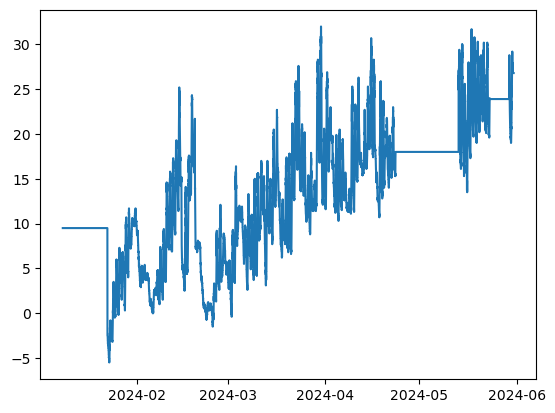

In [10]:
plt.plot(data_104['time'],data_104['Temperature'],label = 'Temperature')

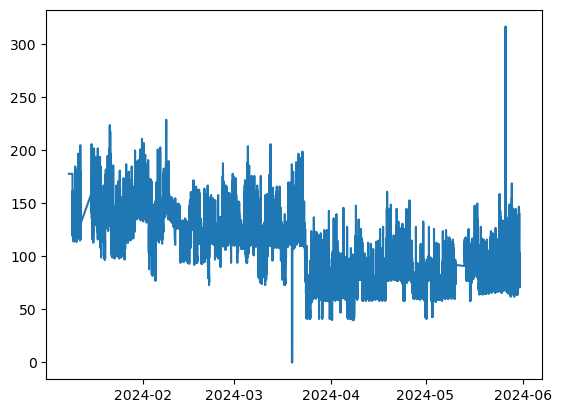

In [11]:
plt.plot(data_104['time'],data_104['Power'],label = 'Power')

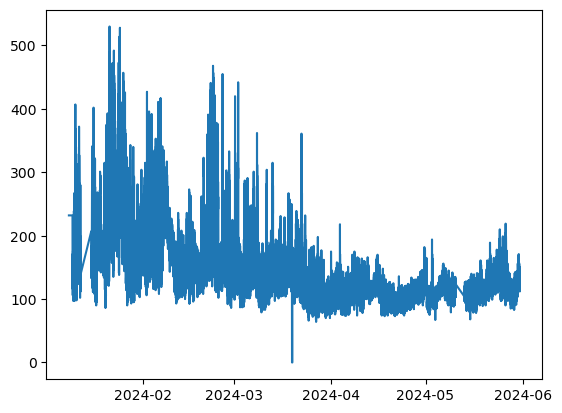

In [15]:
plt.plot(data_104['time'],data_104['Power'],label = 'Power')

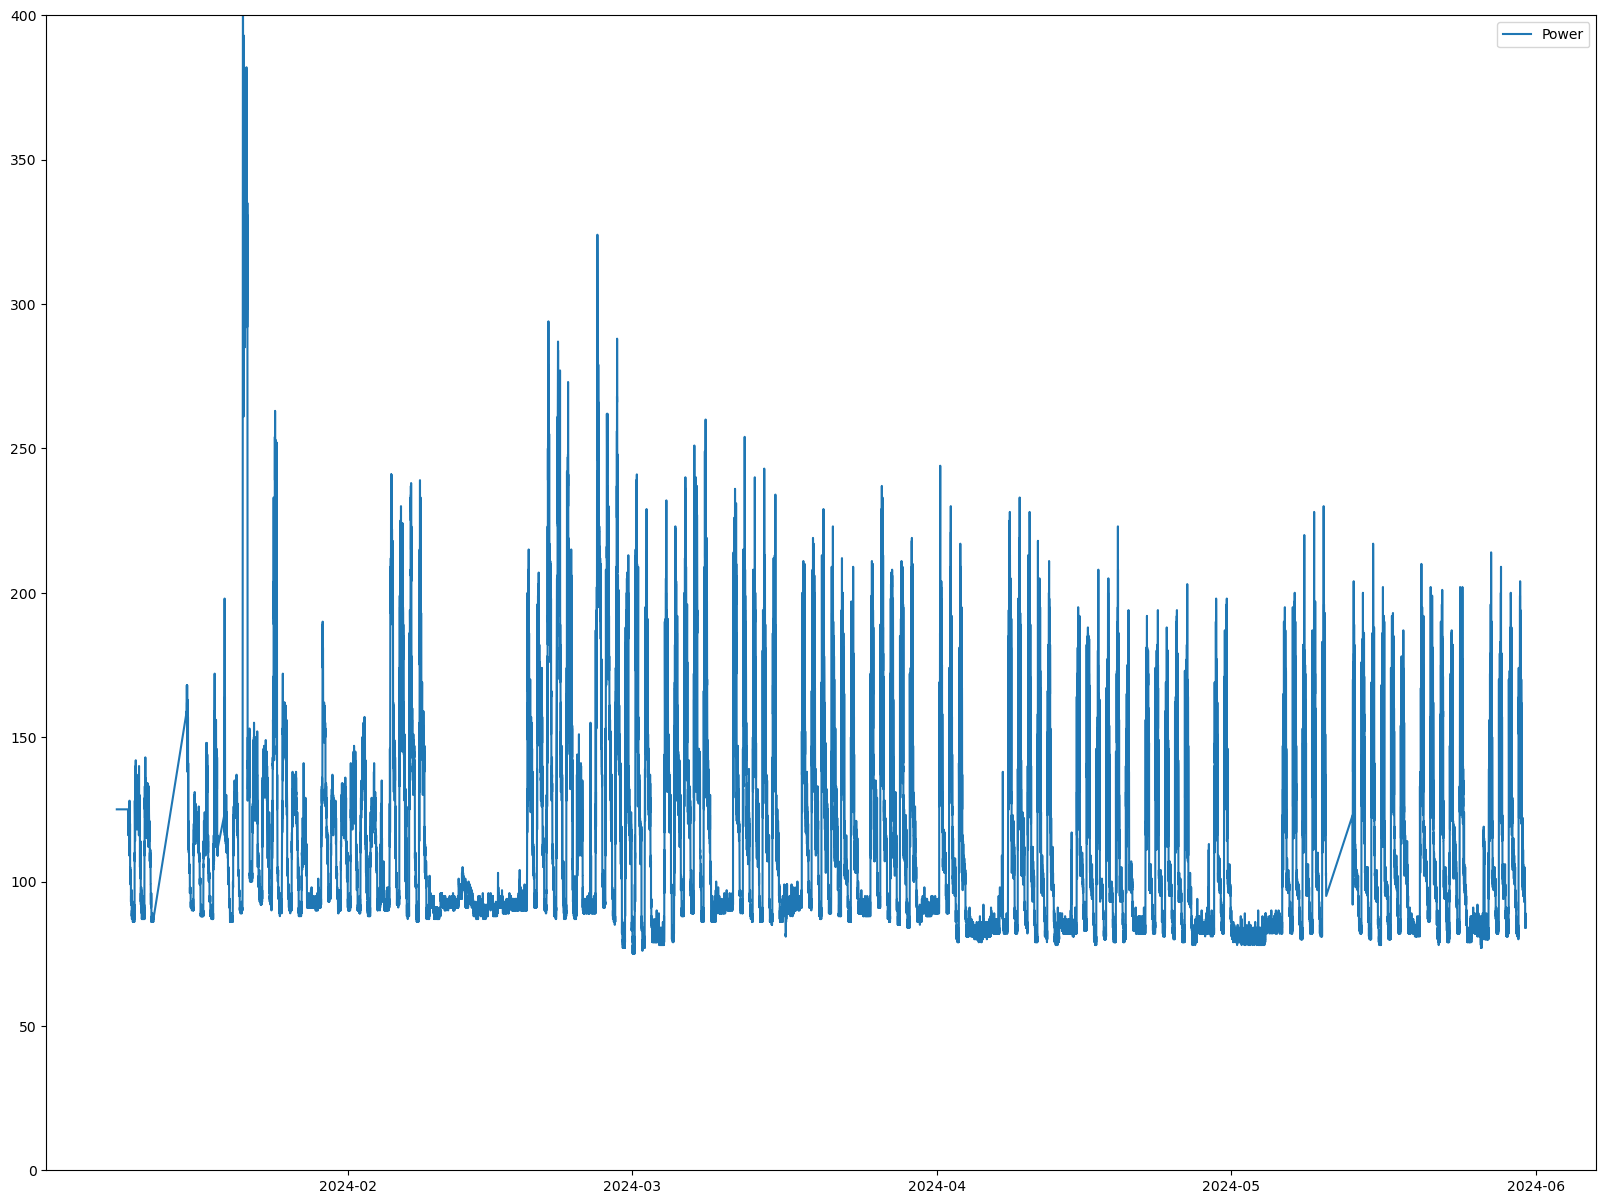

In [36]:
plt.figure(figsize=(20, 15))
plt.plot(data_104['time'],data_104['Power'],label = 'Power')
plt.ylim(0,400)
plt.legend()

(0.0, 400.0)

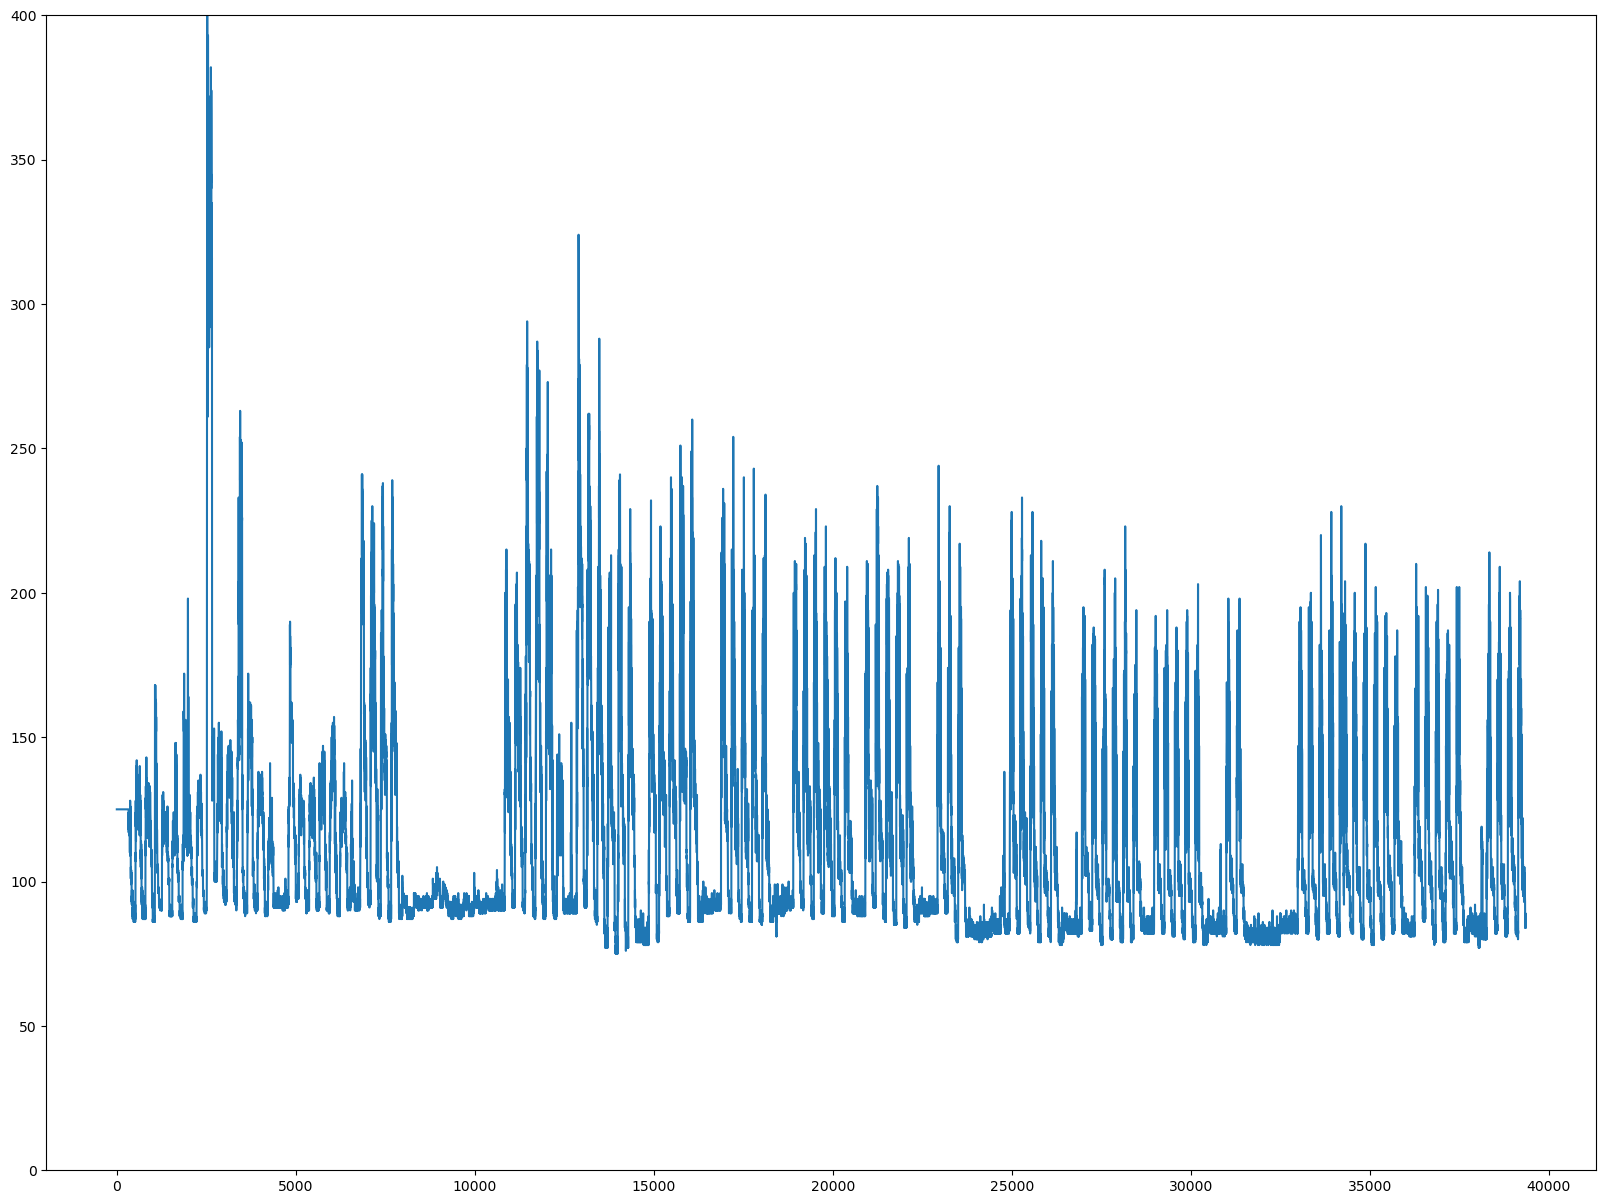

In [34]:
plt.figure(figsize=(20, 15))
plt.plot(data_104.iloc[:,1],label = 'Power')
plt.ylim(0,400)

In [11]:
(data_104['time'].values[3]-data_104['time'].values[2]).astype('timedelta64[m]') == 5

True

In [36]:
def find_missing_date(timestamps, max_gap):
    date = []
    for t1, t2 in zip(timestamps[:-1], timestamps[1:]):
        # print(t1 -t2)
        # print(type(t1 -t2))
        if (t2 - t1).astype('timedelta64[m]') > max_gap:
            start_date = t1.astype('datetime64[D]')
            end_date = t2.astype('datetime64[D]')
            all_dates = np.arange(start_date, end_date + np.timedelta64(1, 'D'), np.timedelta64(1, 'D'))
            # date.append(t1.astype('datetime64[D]'))
            # date.append(t2.astype('datetime64[D]'))
            date.extend(all_dates)

    return date



In [13]:
dates = find_missing_date(data_104['time'].values, 60)

In [14]:
dates

[numpy.datetime64('2024-01-12'),
 numpy.datetime64('2024-01-13'),
 numpy.datetime64('2024-01-14'),
 numpy.datetime64('2024-01-15'),
 numpy.datetime64('2024-01-18'),
 numpy.datetime64('2024-01-19'),
 numpy.datetime64('2024-01-22'),
 numpy.datetime64('2024-05-10'),
 numpy.datetime64('2024-05-11'),
 numpy.datetime64('2024-05-12'),
 numpy.datetime64('2024-05-13')]

In [15]:
data_104[data_104['Power'] == 0]

,time,Power,Temperature,weekday,date


In [16]:
dates.append(np.datetime64('2024-03-19'))

In [16]:
for date in set(dates):
    data_104.drop(data_104[data_104['time'].dt.date == date].index, inplace=True)

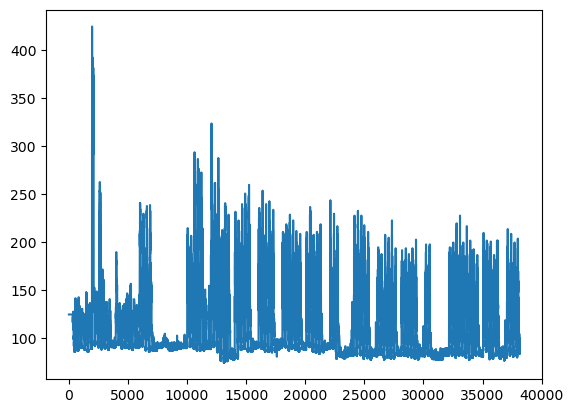

In [17]:
plt.plot(data_104['Power'].values)

In [18]:
data_104[data_104['Temperature'] == 9.5] = np.nan
# # 缺失值处理（如果需要）
data_104.fillna(method='bfill', inplace=True)  # 使用前一个值填充缺失值


# data_104 = data_104.iloc[330:,:]
data_104

,time,Power,Temperature,weekday,date
0,2024-01-23 00:00:00,96.0,-3.9,1.0,2024-01-23
1,2024-01-23 00:00:00,96.0,-3.9,1.0,2024-01-23
2,2024-01-23 00:00:00,96.0,-3.9,1.0,2024-01-23
3,2024-01-23 00:00:00,96.0,-3.9,1.0,2024-01-23
4,2024-01-23 00:00:00,96.0,-3.9,1.0,2024-01-23
...,...,...,...,...,...
39351,2024-05-30 23:35:00,84.0,26.8,3.0,2024-05-30
39352,2024-05-30 23:40:00,88.0,26.8,3.0,2024-05-30
39353,2024-05-30 23:45:00,84.0,26.8,3.0,2024-05-30
39354,2024-05-30 23:50:00,85.0,26.8,3.0,2024-05-30


In [94]:
# drop_index = data_104[data_104['values'] < 2].index.to_list()
# data_104.drop(index=drop_index,inplace=True)
# data_104

# drop_index = data_104[data_104['values'] > 40].index.to_list()
# data_104.drop(index=drop_index,inplace=True)
# data_104

In [19]:
data_104.to_csv('C:/Users/Georg/Desktop/TTRS/2-EMS/research/Forecasting/Data/205_T.csv',index=False)

### Version 2

In [3]:
data = pd.read_excel(r'C:\Users\Georg\Desktop\TTRS\2-EMS\research\Forecasting\RawData\LoadData\new_buildings\LoadData_categorized\进线二_分组数据_all.xlsx',index_col=0)
data

,消防,动力_1_2_3+照明插座,服务器2+评价+空调2+服务器1,空调1,厨房,热源2+3,车用电梯,未分类,Unnamed: 9,照明插座,动力1,动力2,动力3,动力_total,空调2,服务器2,评价,服务器1,Unnamed: 19
2023-12-01 00:00:00,0.0,28.2,105.3,7.8,1.0,45.8,0.3,4.4,NaN,2.6,21.6,0.4,3.6,25.6,23.6,59.0,13.0,9.7,351.9
2023-12-01 00:15:00,0.0,17.8,103.0,6.9,1.0,22.8,0.3,2.5,NaN,5.0,11.0,0.4,1.4,12.8,24.1,59.2,10.0,9.7,287.9
2023-12-01 00:30:00,0.0,15.0,105.3,7.2,1.0,16.6,0.3,2.0,NaN,2.2,11.0,0.4,1.4,12.8,24.5,59.1,12.0,9.7,280.5
2023-12-01 00:45:00,0.0,16.3,104.0,5.6,1.0,16.7,0.3,2.7,NaN,2.2,10.8,0.5,2.8,14.1,25.1,59.1,10.0,9.8,281.0
2023-12-01 01:00:00,0.0,15.1,105.8,8.4,1.1,16.6,0.3,3.4,NaN,2.5,10.7,0.5,1.4,12.6,25.0,59.1,12.0,9.7,284.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 22:45:00,0.1,41.6,124.9,11.7,1.5,3.5,1.4,0.0,NaN,1.1,34.4,1.4,4.7,40.5,34.7,66.2,14.0,10.0,391.7
2024-05-31 23:00:00,0.1,42.9,125.2,11.9,1.2,3.5,1.4,0.0,NaN,1.1,36.7,1.3,3.8,41.8,37.1,66.1,12.0,10.0,396.1
2024-05-31 23:15:00,0.1,56.4,127.0,11.8,1.6,3.5,1.8,0.0,NaN,1.0,48.2,1.4,5.8,55.4,35.7,66.3,15.0,10.0,441.0
2024-05-31 23:30:00,0.1,39.9,129.8,11.7,1.1,3.5,1.8,0.0,NaN,1.1,33.4,1.4,4.0,38.8,37.9,66.0,16.0,9.9,396.4


In [5]:
data.drop(columns=['Unnamed: 9','动力_total','Unnamed: 19'],inplace=True)
data

,消防,动力_1_2_3+照明插座,服务器2+评价+空调2+服务器1,空调1,厨房,热源2+3,车用电梯,未分类,照明插座,动力1,动力2,动力3,空调2,服务器2,评价,服务器1
2023-12-01 00:00:00,0.0,28.2,105.3,7.8,1.0,45.8,0.3,4.4,2.6,21.6,0.4,3.6,23.6,59.0,13.0,9.7
2023-12-01 00:15:00,0.0,17.8,103.0,6.9,1.0,22.8,0.3,2.5,5.0,11.0,0.4,1.4,24.1,59.2,10.0,9.7
2023-12-01 00:30:00,0.0,15.0,105.3,7.2,1.0,16.6,0.3,2.0,2.2,11.0,0.4,1.4,24.5,59.1,12.0,9.7
2023-12-01 00:45:00,0.0,16.3,104.0,5.6,1.0,16.7,0.3,2.7,2.2,10.8,0.5,2.8,25.1,59.1,10.0,9.8
2023-12-01 01:00:00,0.0,15.1,105.8,8.4,1.1,16.6,0.3,3.4,2.5,10.7,0.5,1.4,25.0,59.1,12.0,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 22:45:00,0.1,41.6,124.9,11.7,1.5,3.5,1.4,0.0,1.1,34.4,1.4,4.7,34.7,66.2,14.0,10.0
2024-05-31 23:00:00,0.1,42.9,125.2,11.9,1.2,3.5,1.4,0.0,1.1,36.7,1.3,3.8,37.1,66.1,12.0,10.0
2024-05-31 23:15:00,0.1,56.4,127.0,11.8,1.6,3.5,1.8,0.0,1.0,48.2,1.4,5.8,35.7,66.3,15.0,10.0
2024-05-31 23:30:00,0.1,39.9,129.8,11.7,1.1,3.5,1.8,0.0,1.1,33.4,1.4,4.0,37.9,66.0,16.0,9.9


In [6]:
data['Power'] = data.sum(axis=1)
data

,消防,动力_1_2_3+照明插座,服务器2+评价+空调2+服务器1,空调1,厨房,热源2+3,车用电梯,未分类,照明插座,动力1,动力2,动力3,空调2,服务器2,评价,服务器1,Power
2023-12-01 00:00:00,0.0,28.2,105.3,7.8,1.0,45.8,0.3,4.4,2.6,21.6,0.4,3.6,23.6,59.0,13.0,9.7,326.3
2023-12-01 00:15:00,0.0,17.8,103.0,6.9,1.0,22.8,0.3,2.5,5.0,11.0,0.4,1.4,24.1,59.2,10.0,9.7,275.1
2023-12-01 00:30:00,0.0,15.0,105.3,7.2,1.0,16.6,0.3,2.0,2.2,11.0,0.4,1.4,24.5,59.1,12.0,9.7,267.7
2023-12-01 00:45:00,0.0,16.3,104.0,5.6,1.0,16.7,0.3,2.7,2.2,10.8,0.5,2.8,25.1,59.1,10.0,9.8,266.9
2023-12-01 01:00:00,0.0,15.1,105.8,8.4,1.1,16.6,0.3,3.4,2.5,10.7,0.5,1.4,25.0,59.1,12.0,9.7,271.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 22:45:00,0.1,41.6,124.9,11.7,1.5,3.5,1.4,0.0,1.1,34.4,1.4,4.7,34.7,66.2,14.0,10.0,351.2
2024-05-31 23:00:00,0.1,42.9,125.2,11.9,1.2,3.5,1.4,0.0,1.1,36.7,1.3,3.8,37.1,66.1,12.0,10.0,354.3
2024-05-31 23:15:00,0.1,56.4,127.0,11.8,1.6,3.5,1.8,0.0,1.0,48.2,1.4,5.8,35.7,66.3,15.0,10.0,385.6
2024-05-31 23:30:00,0.1,39.9,129.8,11.7,1.1,3.5,1.8,0.0,1.1,33.4,1.4,4.0,37.9,66.0,16.0,9.9,357.6


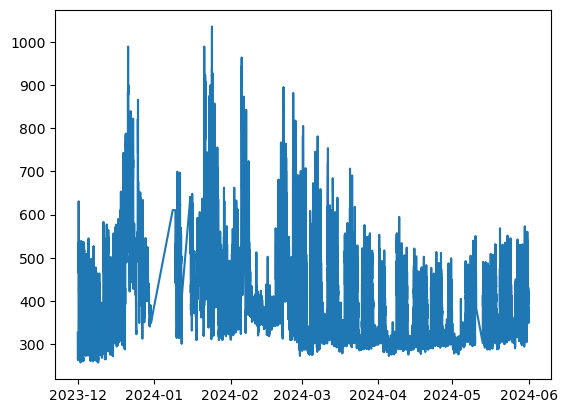

In [8]:
plt.plot(data.index.to_list(),data['Power'],label = 'Power')

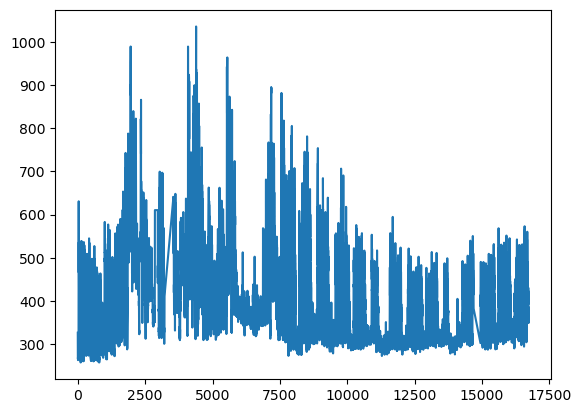

In [42]:
plt.plot(data['Power'].values)

In [76]:
dates = find_missing_date(np.array(data.index.to_numpy()), 30)

In [77]:
dates.append(np.datetime64('2024-01-12'))
dates.append(np.datetime64('2024-01-13'))
dates.append(np.datetime64('2024-01-14'))
dates.append(np.datetime64('2024-01-15'))

In [78]:
dates

[numpy.datetime64('2023-12-29'),
 numpy.datetime64('2023-12-30'),
 numpy.datetime64('2023-12-31'),
 numpy.datetime64('2024-01-01'),
 numpy.datetime64('2024-01-02'),
 numpy.datetime64('2024-01-03'),
 numpy.datetime64('2024-01-04'),
 numpy.datetime64('2024-01-05'),
 numpy.datetime64('2024-01-06'),
 numpy.datetime64('2024-01-07'),
 numpy.datetime64('2024-01-08'),
 numpy.datetime64('2024-01-09'),
 numpy.datetime64('2024-01-12'),
 numpy.datetime64('2024-01-13'),
 numpy.datetime64('2024-01-14'),
 numpy.datetime64('2024-01-15')]

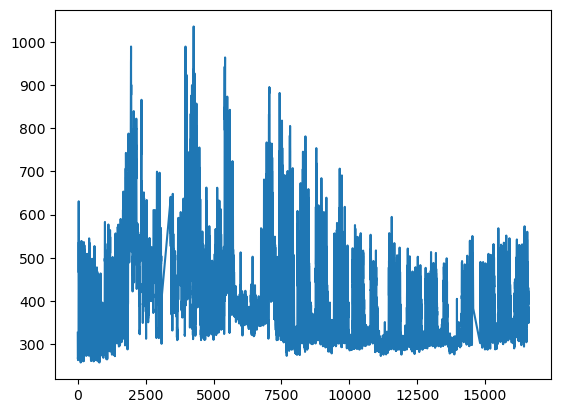

In [79]:
plt.plot(data['Power'].values)

In [80]:
for date in set(dates):
    data.drop(data[data.index.date == date].index, inplace=True)

In [81]:
data

,消防,动力_1_2_3+照明插座,服务器2+评价+空调2+服务器1,空调1,厨房,热源2+3,车用电梯,未分类,照明插座,动力1,动力2,动力3,空调2,服务器2,评价,服务器1,Power
2023-12-01 00:00:00,0.0,28.2,105.3,7.8,1.0,45.8,0.3,4.4,2.6,21.6,0.4,3.6,23.6,59.0,13.0,9.7,326.3
2023-12-01 00:15:00,0.0,17.8,103.0,6.9,1.0,22.8,0.3,2.5,5.0,11.0,0.4,1.4,24.1,59.2,10.0,9.7,275.1
2023-12-01 00:30:00,0.0,15.0,105.3,7.2,1.0,16.6,0.3,2.0,2.2,11.0,0.4,1.4,24.5,59.1,12.0,9.7,267.7
2023-12-01 00:45:00,0.0,16.3,104.0,5.6,1.0,16.7,0.3,2.7,2.2,10.8,0.5,2.8,25.1,59.1,10.0,9.8,266.9
2023-12-01 01:00:00,0.0,15.1,105.8,8.4,1.1,16.6,0.3,3.4,2.5,10.7,0.5,1.4,25.0,59.1,12.0,9.7,271.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 22:45:00,0.1,41.6,124.9,11.7,1.5,3.5,1.4,0.0,1.1,34.4,1.4,4.7,34.7,66.2,14.0,10.0,351.2
2024-05-31 23:00:00,0.1,42.9,125.2,11.9,1.2,3.5,1.4,0.0,1.1,36.7,1.3,3.8,37.1,66.1,12.0,10.0,354.3
2024-05-31 23:15:00,0.1,56.4,127.0,11.8,1.6,3.5,1.8,0.0,1.0,48.2,1.4,5.8,35.7,66.3,15.0,10.0,385.6
2024-05-31 23:30:00,0.1,39.9,129.8,11.7,1.1,3.5,1.8,0.0,1.1,33.4,1.4,4.0,37.9,66.0,16.0,9.9,357.6


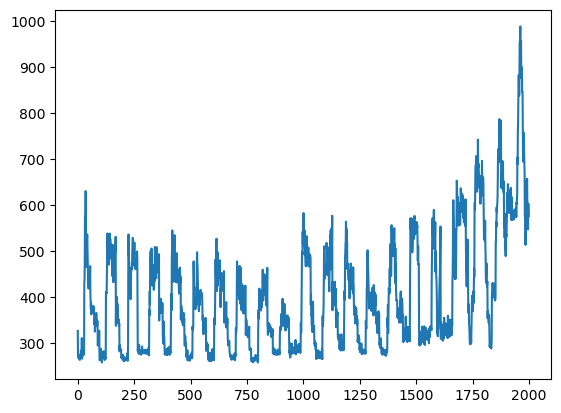

In [83]:
plt.plot(data['Power'].values[:2000])

In [84]:
data

,消防,动力_1_2_3+照明插座,服务器2+评价+空调2+服务器1,空调1,厨房,热源2+3,车用电梯,未分类,照明插座,动力1,动力2,动力3,空调2,服务器2,评价,服务器1,Power
2023-12-01 00:00:00,0.0,28.2,105.3,7.8,1.0,45.8,0.3,4.4,2.6,21.6,0.4,3.6,23.6,59.0,13.0,9.7,326.3
2023-12-01 00:15:00,0.0,17.8,103.0,6.9,1.0,22.8,0.3,2.5,5.0,11.0,0.4,1.4,24.1,59.2,10.0,9.7,275.1
2023-12-01 00:30:00,0.0,15.0,105.3,7.2,1.0,16.6,0.3,2.0,2.2,11.0,0.4,1.4,24.5,59.1,12.0,9.7,267.7
2023-12-01 00:45:00,0.0,16.3,104.0,5.6,1.0,16.7,0.3,2.7,2.2,10.8,0.5,2.8,25.1,59.1,10.0,9.8,266.9
2023-12-01 01:00:00,0.0,15.1,105.8,8.4,1.1,16.6,0.3,3.4,2.5,10.7,0.5,1.4,25.0,59.1,12.0,9.7,271.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 22:45:00,0.1,41.6,124.9,11.7,1.5,3.5,1.4,0.0,1.1,34.4,1.4,4.7,34.7,66.2,14.0,10.0,351.2
2024-05-31 23:00:00,0.1,42.9,125.2,11.9,1.2,3.5,1.4,0.0,1.1,36.7,1.3,3.8,37.1,66.1,12.0,10.0,354.3
2024-05-31 23:15:00,0.1,56.4,127.0,11.8,1.6,3.5,1.8,0.0,1.0,48.2,1.4,5.8,35.7,66.3,15.0,10.0,385.6
2024-05-31 23:30:00,0.1,39.9,129.8,11.7,1.1,3.5,1.8,0.0,1.1,33.4,1.4,4.0,37.9,66.0,16.0,9.9,357.6


In [85]:
load_data = data['Power']
load_data.to_csv('C:/Users/Georg/Desktop/TTRS/2-EMS/research/Forecasting/Data/Total_12-5.csv')

In [2]:
result_df = pd.read_csv(r'C:/Users/Georg/Desktop/TTRS/2-EMS/research/Forecasting/Data/Total_12-5.csv')

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000')])

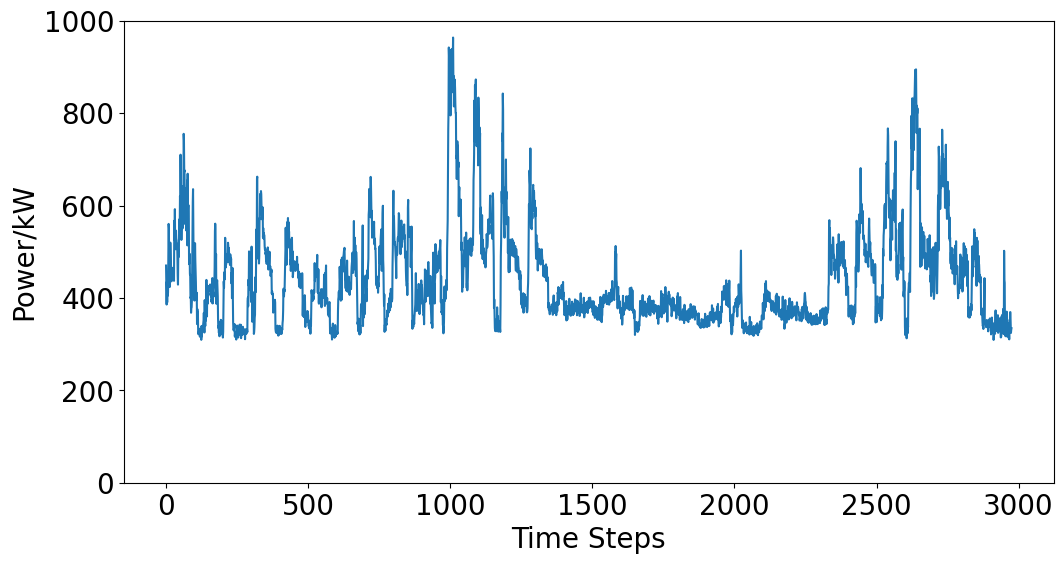

In [7]:
plt.figure(figsize=(12,6))
plt.plot(np.array(result_df['Power'])[96*40:96*71])
plt.ylim(0,1000)
plt.xlabel('Time Steps', fontdict={'fontsize': 20})
plt.ylabel('Power/kW',fontdict={'fontsize': 20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
